In [ ]:
#visual explanation models
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16, imagenet_utils
from tensorflow.keras.models import Model

In [ ]:
# Load pre-trained VGG16 model
model = VGG16(weights="imagenet")


553467096/553467096 [==============================] - 6s 0us/step


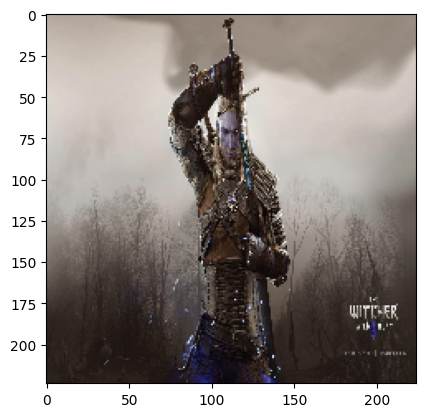

In [ ]:
# Load and preprocess the image
img = cv2.imread('witcher3.jpg')
img_resize = cv2.resize(img, (224, 224))
plt.imshow(img_resize)

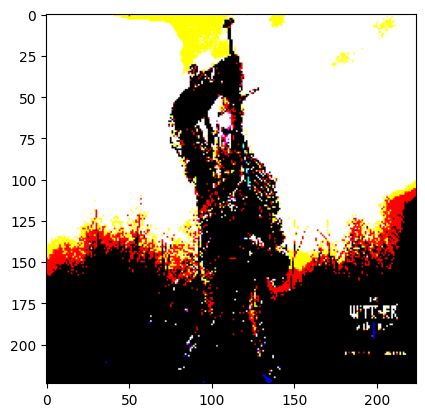

In [ ]:
img = load_img("witcher3.jpg", target_size=(224, 224))
img = img_to_array(img)
img = np.expand_dims(img, axis=0)
img = imagenet_utils.preprocess_input(img)
plt.imshow(img[0])

In [ ]:
pred = model.predict(img)

# Decode predictions
decod = imagenet_utils.decode_predictions(pred, top=5)
(img_id, label, prob) = decod[0][0]
print(label, ":", prob * 100)


35363/35363 [==============================] - 0s 0us/step
fountain : 88.91660571098328


In [ ]:
# Construct a new model for gradient computation
gradModel = Model(inputs=model.inputs, outputs=[model.get_layer('block5_conv3').output, model.output])


In [ ]:
# Compute gradients
with tf.GradientTape() as tape:
    input = tf.cast(img, tf.float32)
    (convOutputs, predictions) = gradModel(input)
    pred_index = tf.argmax(pred[0])
    loss = predictions[:, pred_index]


In [ ]:
grads = tape.gradient(loss, convOutputs)
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
last_conv_layer_output = convOutputs[0]
saliency_maps = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
saliency_maps = tf.squeeze(saliency_maps)
saliency_maps = tf.maximum(saliency_maps, 0)
tf.reduce_max(saliency_maps)
saliency_maps.numpy()

array([[2.2905569e-04, 2.4798952e-04, 8.0044963e-04, 2.7866140e-03,
        4.0929178e-03, 4.9068467e-03, 6.0498076e-03, 6.1636339e-03,
        3.0513380e-03, 5.6117109e-04, 2.1700325e-04, 1.8067230e-04,
        1.3901565e-04, 9.3720085e-04],
       [0.0000000e+00, 1.0736716e-05, 0.0000000e+00, 2.0929882e-03,
        2.1794538e-03, 2.2458220e-03, 5.0777160e-03, 5.7769674e-03,
        3.7789294e-03, 1.6670872e-04, 2.6920025e-04, 2.6587298e-04,
        3.7789281e-04, 7.8474777e-04],
       [0.0000000e+00, 0.0000000e+00, 2.3775079e-04, 1.6659130e-03,
        2.1134608e-03, 3.5791425e-03, 4.9833963e-03, 5.4472615e-03,
        4.9984688e-03, 9.4545411e-04, 8.0602110e-04, 1.3167462e-03,
        1.1049765e-03, 1.5671046e-03],
       [0.0000000e+00, 0.0000000e+00, 2.7918271e-04, 1.9701114e-03,
        5.5218092e-03, 6.0293619e-03, 2.5982964e-03, 1.0741213e-03,
        3.0132527e-03, 7.1299949e-04, 3.5270560e-04, 9.5984957e-04,
        7.1615161e-04, 1.0939178e-03],
       [4.2588578e-04, 1.412

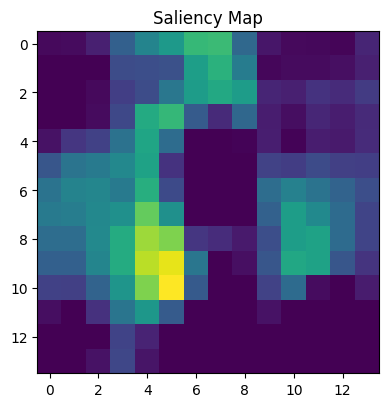

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.title('Saliency Map')
plt.imshow(saliency_maps)


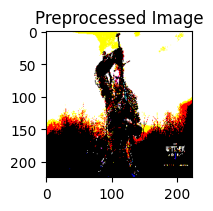

In [ ]:


plt.subplot(132)
plt.title('Preprocessed Image')
plt.imshow(img[0])


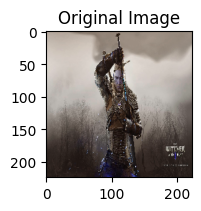

In [ ]:
plt.subplot(133)
plt.title('Original Image')
plt.imshow(img_resize)

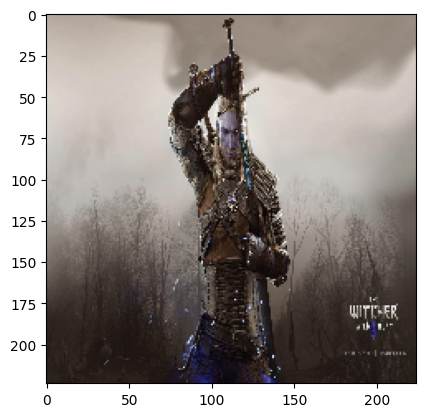

In [ ]:
plt.imshow(img_resize)
plt.show()